In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("scaler.csv")

In [3]:
df.head()

,User_ID,Gender,No_of_Days,No_of_Calls,Enrolled
0,1,Male,63,4,0
1,2,Female,85,28,1
2,3,Male,32,3,0
3,4,Male,87,9,1
4,5,Male,33,16,0


<Axes: xlabel='No_of_Calls', ylabel='No_of_Days'>

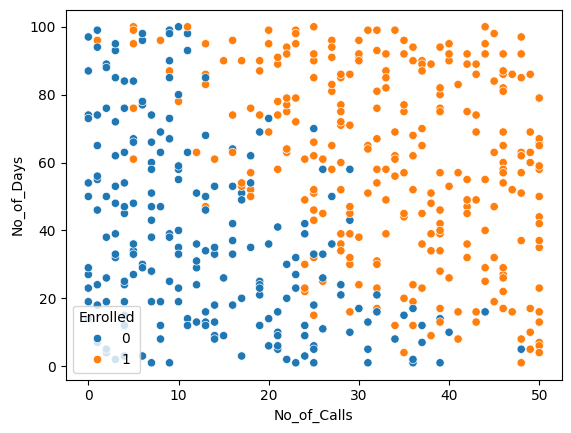

In [4]:
sns.scatterplot(data=df, x = "No_of_Calls", y="No_of_Days", hue="Enrolled")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[["No_of_Calls", "No_of_Days"]].values, df["Enrolled"].values, test_size=0.33, random_state=42)

In [8]:
# Normalization

mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)

In [9]:
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

In [10]:
def dist(x1, x2):
    """ Euclidean Distance """
    return np.sqrt(np.sum((x1 - x2)**2))

In [11]:
def knn(X, Y, x_query_point, k=5):

    """ K Nearest Neighbors Algorithm 
    Predict the class label for the query point x_query_point based on the 
    training data (X, Y) using k nearest neighbors.
    """

    distances = []
    m = X.shape[0]

    # create the distance matrix
    for i in range(m):
        d = dist(x_query_point, X[i])
        distances.append((d, Y[i]))

    # Sort the distances in ascending order
    distances = sorted(distances)
    # Nearest k neighbors
    neighbors = distances[:k]
    
    neighbors = np.array(neighbors)

    # Get the most frequent class label among the neighbors

    classes_count = np.unique(neighbors[:, 1], return_counts=True)

    index = np.argmax(classes_count[1])
    prediction = classes_count[0][index]

    return int(prediction)


In [ ]:
X_test[100]

array([ 0.28412359, -1.21492267])

In [18]:
knn(X_train, y_train, X_test[102])

1

In [17]:
y_test[102]

np.int64(1)

In [21]:
# Now We implement the KNN alogorithm with the help of sklearn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
y_pred = knn.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[58, 13],
       [14, 80]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        71
           1       0.86      0.85      0.86        94

    accuracy                           0.84       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.84      0.84      0.84       165



In [37]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)  # Manhattan distance
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
y_pred = knn.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        71
           1       0.87      0.86      0.87        94

    accuracy                           0.85       165
   macro avg       0.85      0.85      0.85       165
weighted avg       0.85      0.85      0.85       165



In [40]:
train_accuracy = []
test_accuracy = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_1976\24110257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_accuracy, label="Train Accuracy")
C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_1976\24110257.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_accuracy, l

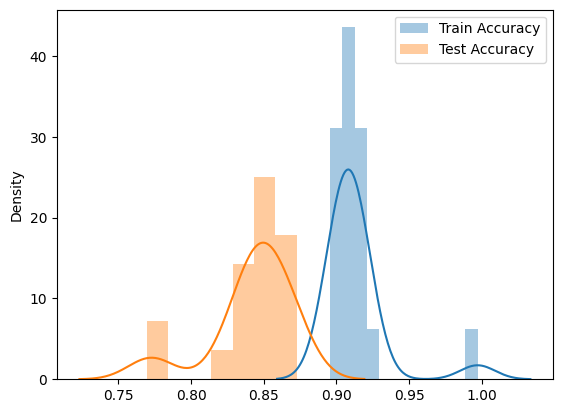

In [47]:
sns.distplot(train_accuracy, label="Train Accuracy")
sns.distplot(test_accuracy, label="Test Accuracy")
plt.legend()

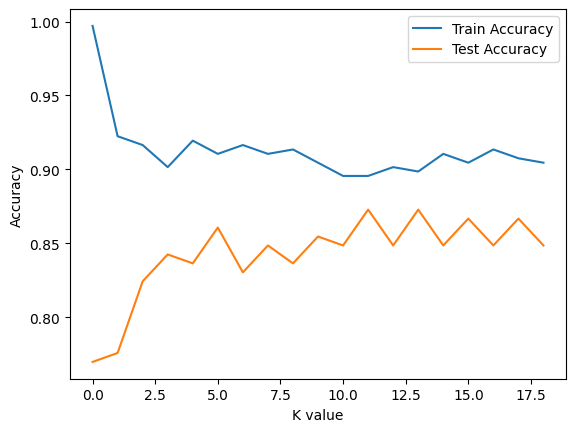

In [42]:
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<Axes: >

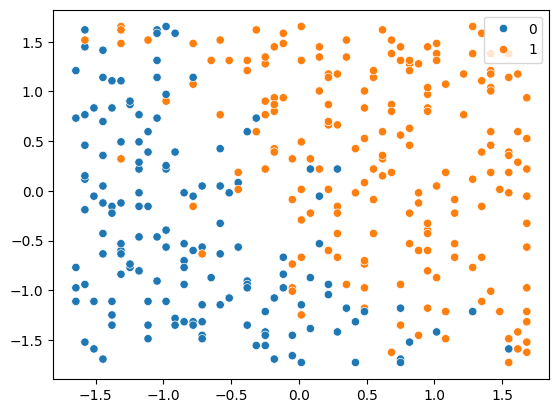

In [44]:
sns.scatterplot(x =X_train[:,0], y = X_train[:,1], hue=y_train)

<Axes: >

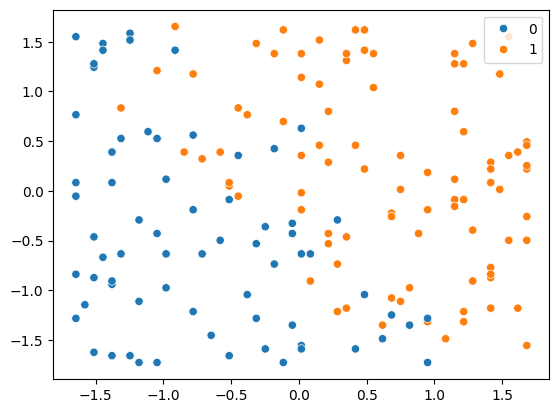

In [46]:
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue=y_test)

#### So, our dataset is allow a linear line to classify it.

In [55]:
mnist = pd.read_csv("mnist_test.csv")

In [56]:
mnist.shape

(10000, 785)

In [57]:
mnist.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [59]:
mnist_labels = mnist['label']
mnist_data = mnist.drop(columns=['label'])

In [60]:
def plot_img(img):
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis(False)


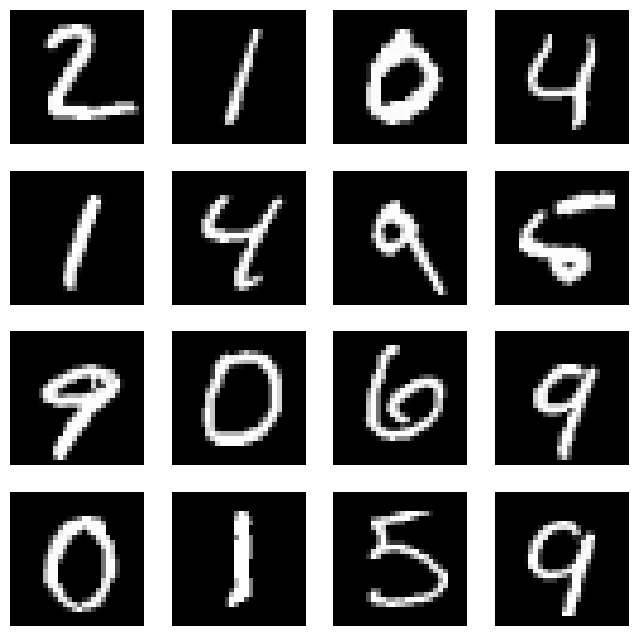

In [61]:
plt.figure(figsize=(8, 8))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plot_img(mnist_data.iloc[i].values)

In [62]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=4)

In [82]:
X = pca.fit_transform(mnist_data)

In [83]:
print(X[:5])

[[-411.26099613 -686.56161016   51.11294617  242.56873406]
 [  58.06593519  983.17025995   -8.88468962 -397.28032645]
 [-935.10533853  459.07466105 -319.99450898 -262.53050241]
 [1255.66650618 -106.99254128 -121.96698162  246.64975402]
 [ 132.88704929 -744.54184514   61.20153075 -703.88328497]]


In [84]:
df = pd.DataFrame(X, columns=['f1', 'f2', 'f3', 'f4'])
df['y'] = mnist_labels

<Axes: xlabel='f1', ylabel='f2'>

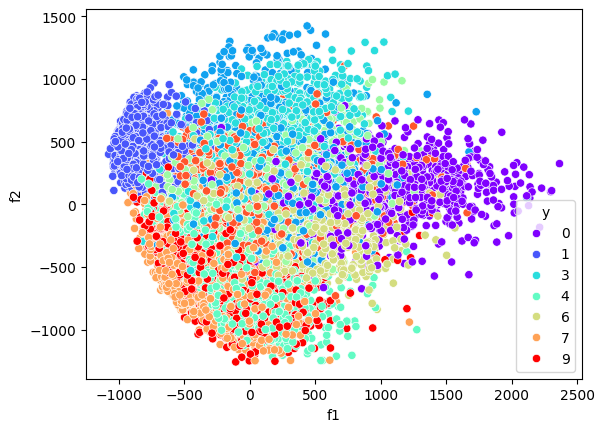

In [ ]:
sns.scatterplot(data=df, x = "f1", y="f2", hue="y", palette="rainbow")

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df[['f1', 'f2', 'f3', 'f4']].values, df['y'].values, test_size=0.33, random_state=42)

In [86]:
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

In [87]:
knn2 = KNeighborsClassifier()

In [88]:
knn2.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [89]:
y_pred = knn2.predict(X_test)

In [90]:
confusion_matrix(y_test, y_pred)

array([[257,   0,  13,   1,   0,   5,  33,   0,   8,   0],
       [  0, 369,   1,   1,   0,   2,   5,   1,   5,   0],
       [ 18,   4, 236,  10,   7,   3,  52,   2,   6,   0],
       [  5,   4,  23, 221,   2,  37,   5,   4,  37,   0],
       [  4,   0,   7,   0, 209,  12,  18,  45,   4,  47],
       [ 17,   2,   6,  34,  11, 139,   4,   4,  50,   5],
       [ 16,   3,  58,   4,  11,   5, 221,   0,  10,   0],
       [  1,   6,   3,   2,  66,  10,   2, 171,   3,  59],
       [ 24,   3,  10,  59,   8,  79,   9,   8, 107,   8],
       [  4,   3,   2,   2,  74,  12,   3, 109,   9, 121]])

<Axes: >

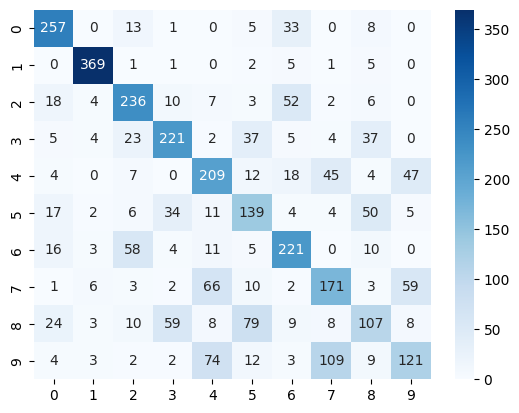

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       317
           1       0.94      0.96      0.95       384
           2       0.66      0.70      0.68       338
           3       0.66      0.65      0.66       338
           4       0.54      0.60      0.57       346
           5       0.46      0.51      0.48       272
           6       0.63      0.67      0.65       328
           7       0.50      0.53      0.51       323
           8       0.45      0.34      0.39       315
           9       0.50      0.36      0.42       339

    accuracy                           0.62      3300
   macro avg       0.61      0.61      0.61      3300
weighted avg       0.62      0.62      0.62      3300



In [93]:
train_accuracy = []
test_accuracy = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

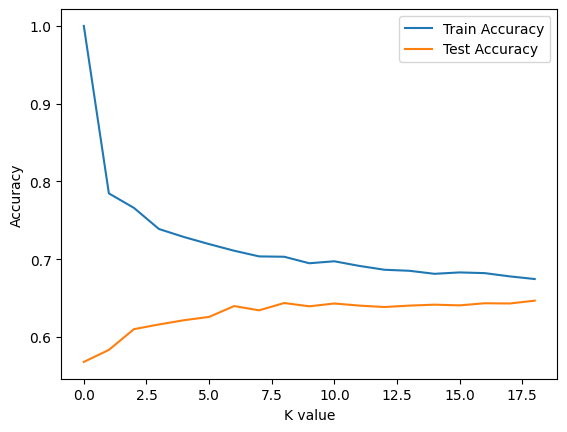

In [94]:
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(test_accuracy, label="Test Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()